# Health Expenditure and Suicide Rates [2000-2019]
### Relation between health expenditure and suicide rates, in 2000/2019, WHO stats.

https://www.kaggle.com/code/fernandoretamales/who-hexpandsuirates/data

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats #for outlier detection based on standard deviations
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [9, 7] # Set the figure size - handy for larger output
%config InlineBackend.figure_format = 'retina' # Set up with a higher resolution screen
import seaborn as sns

In [2]:
#current directory
df_url = 'https://raw.githubusercontent.com/erickbezerra/VScode/master/Projects/DBexploring/WHO_MHE/Source/WHO_MHExp_and_Deaths.csv';
df = pd.read_csv(df_url); # df = pd.read_csv(df_url, encoding = 'utf-16', sep = '\t', error_bad_lines = False, skiprows = 1, skipfooter = 3, engine = 'python')
df_lines, df_columns = df.shape;
pd.set_option('display.max.columns', None); # configure the display.max.columns option to make sure pandas doesn’t hide any columns.
df.head()

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
0,Armenia,2006,3219235.0,54404,78,5.85,3.38,4.99,5.36
1,Armenia,2007,3107395.5,53660,0,5.50,3.38,4.99,5.02
2,Armenia,2008,3234031.0,54824,63,6.64,3.38,4.99,4.23
3,Armenia,2009,3066044.0,55120,53,8.44,3.38,4.99,4.06
4,Armenia,2012,3024127.0,55200,79,9.13,3.38,4.99,6.39


In [3]:
df.tail()

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
526,Uzbekistan,2015,31298929.0,304070,2392,4.99,2.32,4.23,9.20
527,Uzbekistan,2016,31847898.0,309582,2467,4.97,2.32,4.23,9.21
528,Uzbekistan,2017,32388561.0,321446,2417,5.08,2.32,4.23,8.92
529,Uzbekistan,2018,32956099.0,309826,2278,5.30,2.32,4.23,8.73
530,Uzbekistan,2019,33580390.0,309138,2318,5.62,2.32,4.23,8.28


Where:

| VARIABLE | DESCRIPTION |
|---|---|
| Country_Name | Countries | 
| Year | Years |
| Population | Number of Population |
| Deaths_All_Types | Total Deaths |
| Deaths_Suicides | Deaths by suicides according to ICD10 |
| HExp_Pctage_Y | Health Expenditure as % of GDP |
| MHExp_Pctage_2011 | Mental Health Expenditure index in 2011 |
| Dep_Num_2015 | Depression estimate index in 2015 |
| Suicide_p100 | Number of suicides per 100,000 population |

In [4]:
df.describe().round(2)

,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
count,531.00,5.310000e+02,531.00,531.00,531.00,531.00,531.00,531.00
mean,2009.69,2.535148e+07,432276.35,259.66,7.56,5.73,4.89,10.83
std,5.57,3.285463e+07,585679.88,1075.05,2.10,2.95,0.61,5.49
min,2000.00,2.811540e+05,836.00,0.00,1.99,0.39,2.90,0.82
25%,2005.00,3.553031e+06,57336.00,0.00,6.10,3.86,4.57,6.42
50%,2010.00,9.696110e+06,184150.00,2.00,7.90,5.08,5.06,10.24
75%,2014.00,3.811594e+07,741164.00,42.50,9.07,7.64,5.19,14.50
max,2019.00,2.101471e+08,2762186.00,20031.00,13.68,12.91,5.94,29.63


Look the max of "Death_Suicides". It's away too far from the mean.

In [5]:
df_check = df.loc[df['Deaths_Suicides'] == 20031]
df_check[:]

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
262,Japan,2018,124218285.0,2724940,20031,10.75,4.94,4.24,13.37


So Japan is the outlier, let's take a look into Japan's serie:

In [6]:
df_check = df.loc[df['Country_Name'] == 'Japan']
df_check[:]

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
244,Japan,2000,125612633.0,1923306,5,7.03,4.94,4.24,18.08
245,Japan,2001,125908000.0,1940662,9,7.24,4.94,4.24,17.46
246,Japan,2002,126008000.0,1964758,4,7.35,4.94,4.24,17.88
247,Japan,2003,126140000.0,2029902,9,7.49,4.94,4.24,19.52
248,Japan,2004,126176000.0,2057204,8,7.54,4.94,4.24,18.42
249,Japan,2005,126204902.0,2167592,4,7.66,4.94,4.24,18.81
250,Japan,2006,126154000.0,2168900,2,7.69,4.94,4.24,18.44
251,Japan,2007,126085000.0,2216668,2,7.78,4.94,4.24,19.14
252,Japan,2008,125947000.0,2284814,7,8.09,4.94,4.24,19.03
253,Japan,2009,125820000.0,2283730,7,8.96,4.94,4.24,19.49


Clearly there's an unusual value in 2018 compared to the rest.

Let's check if the Dtype of the Columns are ok:

In [7]:
# Check column titles and classes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country_Name       531 non-null    object 
 1   Year               531 non-null    int64  
 2   Population         531 non-null    float64
 3   Deaths_All_Types   531 non-null    int64  
 4   Deaths_Suicides    531 non-null    int64  
 5   HExp_Pctage_Y      531 non-null    float64
 6   MHExp_Pctage_2011  531 non-null    float64
 7   Dep_Num_2015       531 non-null    float64
 8   Suicide_p100       531 non-null    float64
dtypes: float64(5), int64(3), object(1)
memory usage: 37.5+ KB


As we can see, there isn't any null values.

As a matter of automation the next code give me a percentual of nullsvalues for each column.

In [8]:
# Check for percentage of nulls
df.isnull().sum() /df.shape[0] # sum of all null / number of lines

Country_Name         0.0
Year                 0.0
Population           0.0
Deaths_All_Types     0.0
Deaths_Suicides      0.0
HExp_Pctage_Y        0.0
MHExp_Pctage_2011    0.0
Dep_Num_2015         0.0
Suicide_p100         0.0
dtype: float64

The heatmap will give me a clear vision of missing data

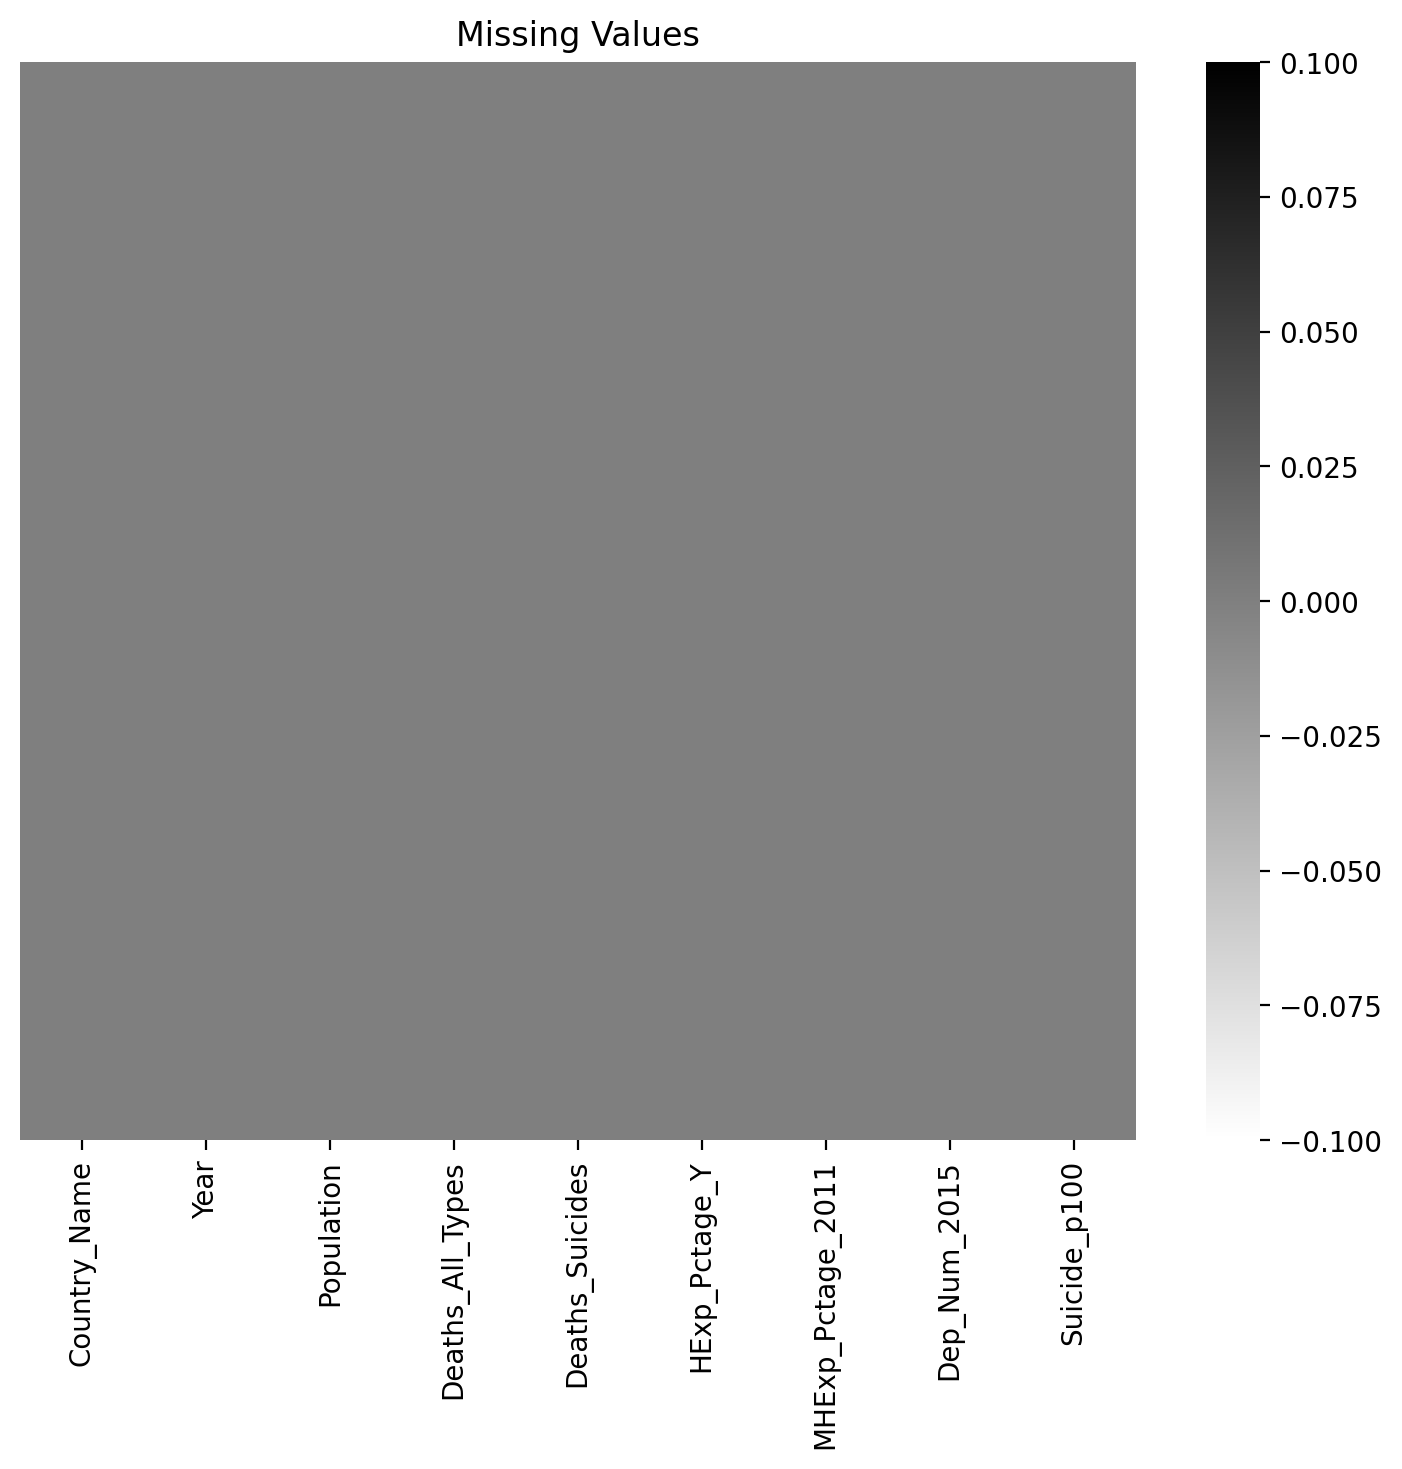

In [9]:
# Visualising the missing values in the dataframe
sns.heatmap(df.isnull() , yticklabels = False, cmap='gist_yarg'); #YlOrBr
plt.title('Missing Values');

In [10]:
# Check correlation
df.corr().round(2)

,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
Year,1.00,0.03,0.04,0.07,0.12,-0.13,-0.03,-0.24
Population,0.03,1.00,0.96,0.15,0.12,0.05,-0.29,-0.10
Deaths_All_Types,0.04,0.96,1.00,0.13,0.26,0.14,-0.17,-0.02
Deaths_Suicides,0.07,0.15,0.13,1.00,-0.13,-0.14,-0.09,0.04
HExp_Pctage_Y,0.12,0.12,0.26,-0.13,1.00,0.61,0.40,0.11
MHExp_Pctage_2011,-0.13,0.05,0.14,-0.14,0.61,1.00,0.25,0.24
Dep_Num_2015,-0.03,-0.29,-0.17,-0.09,0.40,0.25,1.00,0.21
Suicide_p100,-0.24,-0.10,-0.02,0.04,0.11,0.24,0.21,1.00


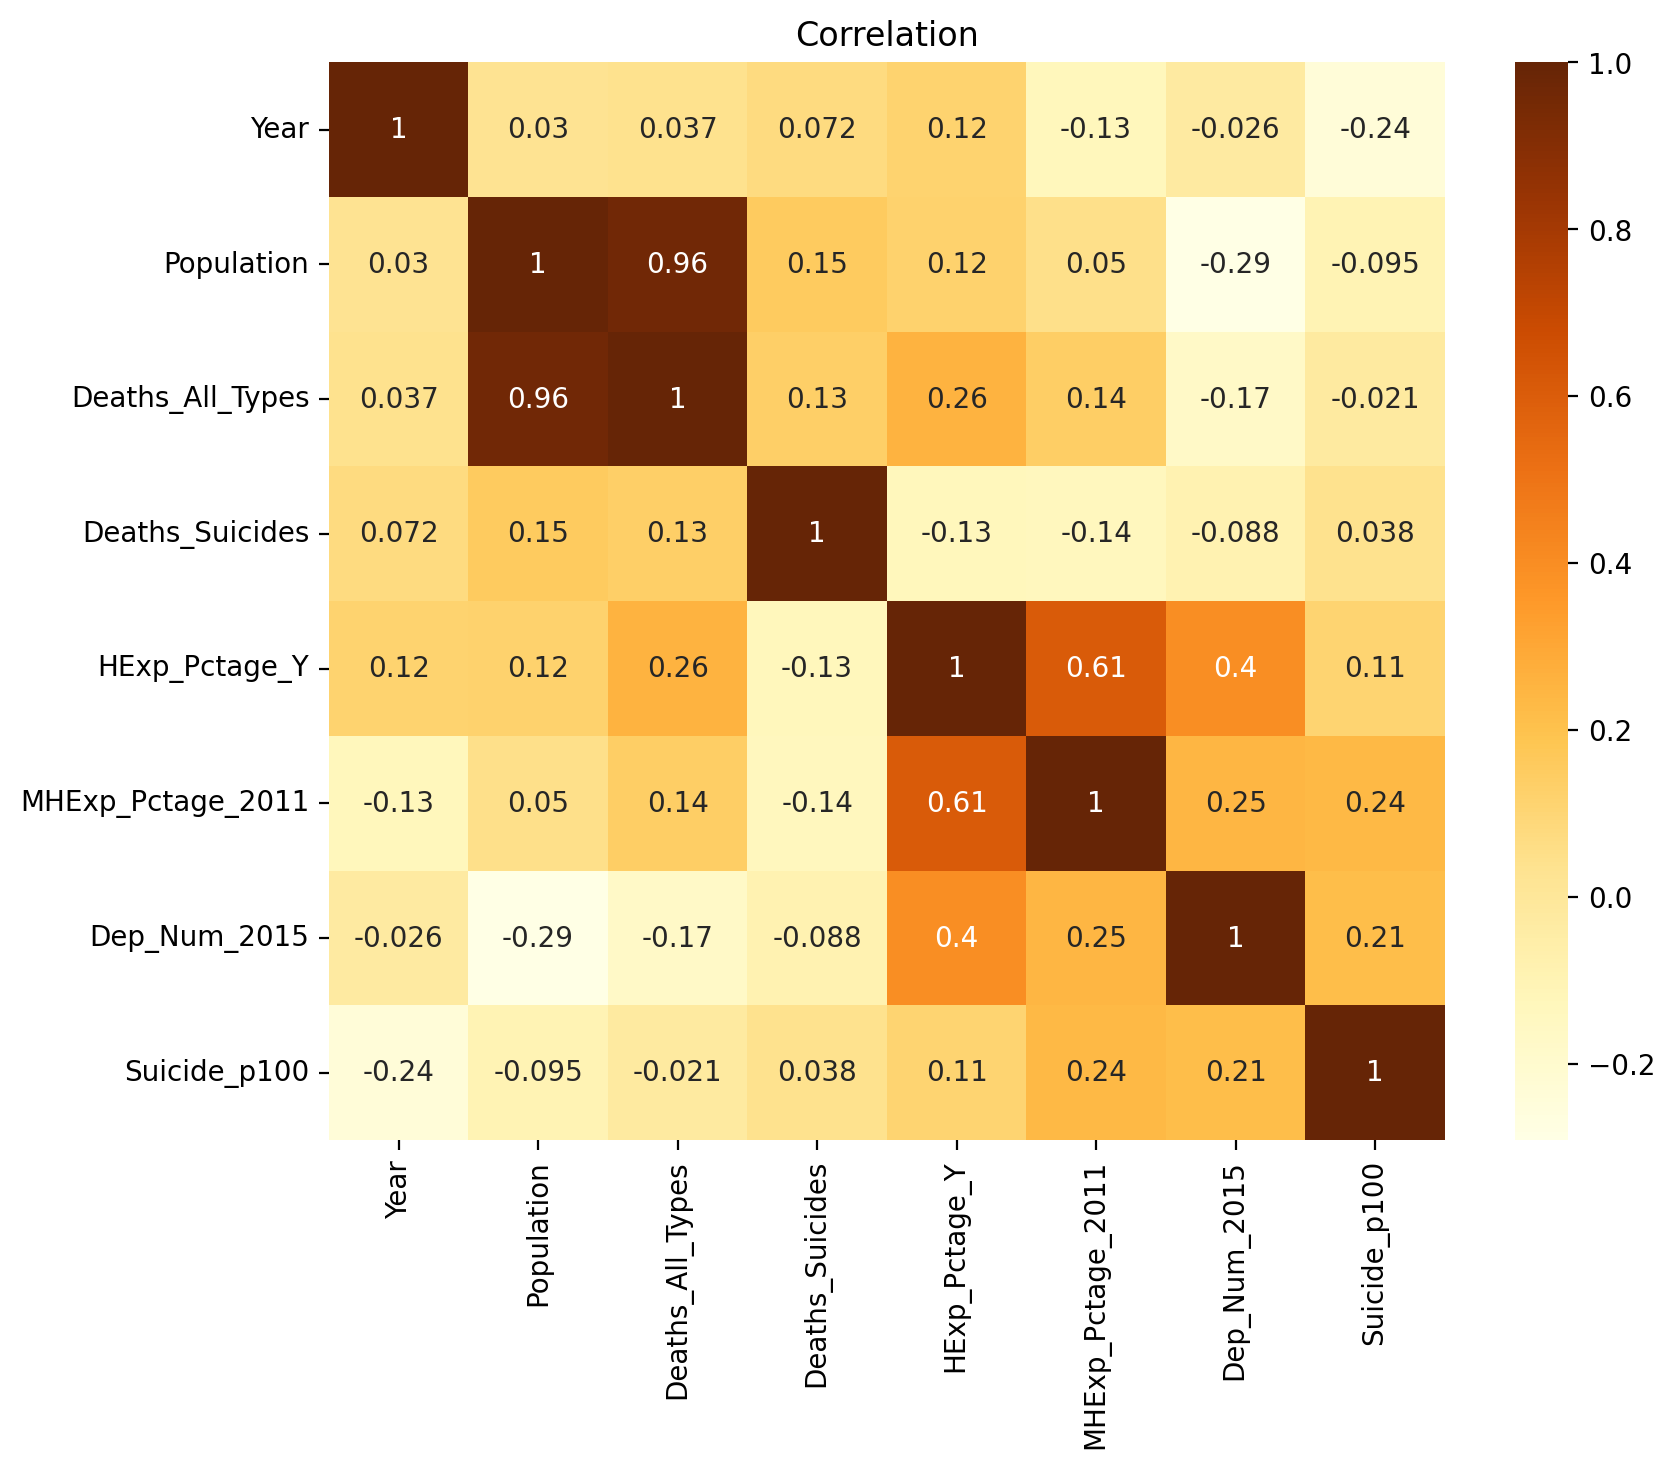

In [11]:
# Check correlation
fig, ax = plt.subplots(); # fig, ax = plt.subplots(figsize = (9, 7));
sns.heatmap(df.corr(), annot = True, cmap='YlOrBr');
plt.title('Correlation');

In [12]:
# Listing minimu correlation
df.corr().min()

Year                -0.241000
Population          -0.291873
Deaths_All_Types    -0.174404
Deaths_Suicides     -0.140421
HExp_Pctage_Y       -0.128837
MHExp_Pctage_2011   -0.140421
Dep_Num_2015        -0.291873
Suicide_p100        -0.241000
dtype: float64

The search of "average" correlation values is to reduce the use of features

# Data Cleaning
No data cleaning was used in this DB.

In [13]:
# Deleting columns having medium corrleation (not so low not so high)
# del df["Deaths_Suicides"]
# del df["HExp_Pctage_Y"]
# del df["MHExp_Pctage_2011"]
# df.head()

# Drop rows with missing values
# df.dropna()
# Drop columns with missing values
# df.dropna(axis=1)

# Replace the NaN values with the expression of ‘NULL’ using fillna
# df['values'] = df['values'].fillna('NULL')

# Fill in missing values with 0
# df.fillna(0)

# Filling the life expectancy and adult mortality with the mean values as it has a very less number of missing values 
# df["life_expectancy"] = df["life_expectancy"].fillna(value = df["life_expectancy"].mean())

# Replace missing using the most frequent value along each column. Can be used with strings or numeric data.
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy='most_frequent')
# new_df = imputer.fit_transform(df)

# filling the missing values of alcohol 
# is can be seen that the alcohol column is mostly correlated with the schooling column
# so using the schooling column as reference to fill the missing values 
# min value of schooling is 0 and max value is 20.7
# cutting the dataframe into 4 parts [0 , 5 , 10  , 15 , 21]

# df["group"] = pd.cut(df["schooling"] , bins = (0 , 5 , 7.5 , 10 , 15 , 21 ) , labels = ["g1" , "g2" , "g3" , "g4" , "g5"])
# df["group"].value_counts()

# grouped = df.groupby(df.group)["alcohol"].mean()
# grouped
# this gives the average value for each group

# Visualization

In [14]:
# List of unique countries
# unique_countries = df[~df.duplicated('Country_Name')]; # Remove duplicate values
# countries_list = unique_countries['Country_Name'].tolist(); # Create a list
unique_countries = df.groupby(['Country_Name']).nunique();
unique_countries.head()

,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
Country_Name,,,,,,,,
Armenia,12,12,12,8,12,1,1,12
Australia,19,19,19,5,19,1,1,19
Azerbaijan,5,5,5,5,4,1,1,5
Brazil,1,1,1,1,1,1,1,1
Bulgaria,15,15,15,11,14,1,1,15


In [15]:
# Checking why the number of years are 12 and only 8 deaths by suicide were counted.
df_check = df.loc[df['Country_Name'] == 'Armenia']
df_check[:]

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
0,Armenia,2006,3219235.0,54404,78,5.85,3.38,4.99,5.36
1,Armenia,2007,3107395.5,53660,0,5.50,3.38,4.99,5.02
2,Armenia,2008,3234031.0,54824,63,6.64,3.38,4.99,4.23
3,Armenia,2009,3066044.0,55120,53,8.44,3.38,4.99,4.06
4,Armenia,2012,3024127.0,55200,79,9.13,3.38,4.99,6.39
5,Armenia,2013,3021979.0,54392,67,10.32,3.38,4.99,5.31
6,Armenia,2014,3013839.0,55428,58,10.18,3.38,4.99,4.63
7,Armenia,2015,3004588.0,55756,74,10.12,3.38,4.99,4.70
8,Armenia,2016,2992364.0,56452,0,9.95,3.38,4.99,4.43
9,Armenia,2017,2912921.0,54250,0,10.36,3.38,4.99,2.43


As we can see the number is different because pandas counts the number of unique values of each column

In [16]:
# Number of inputs of each country
inputs_each_country = df.groupby(['Country_Name']).size().reset_index(name='Count');
inputs_each_country.head()

,Country_Name,Count
0,Armenia,12
1,Australia,19
2,Azerbaijan,5
3,Brazil,1
4,Bulgaria,15


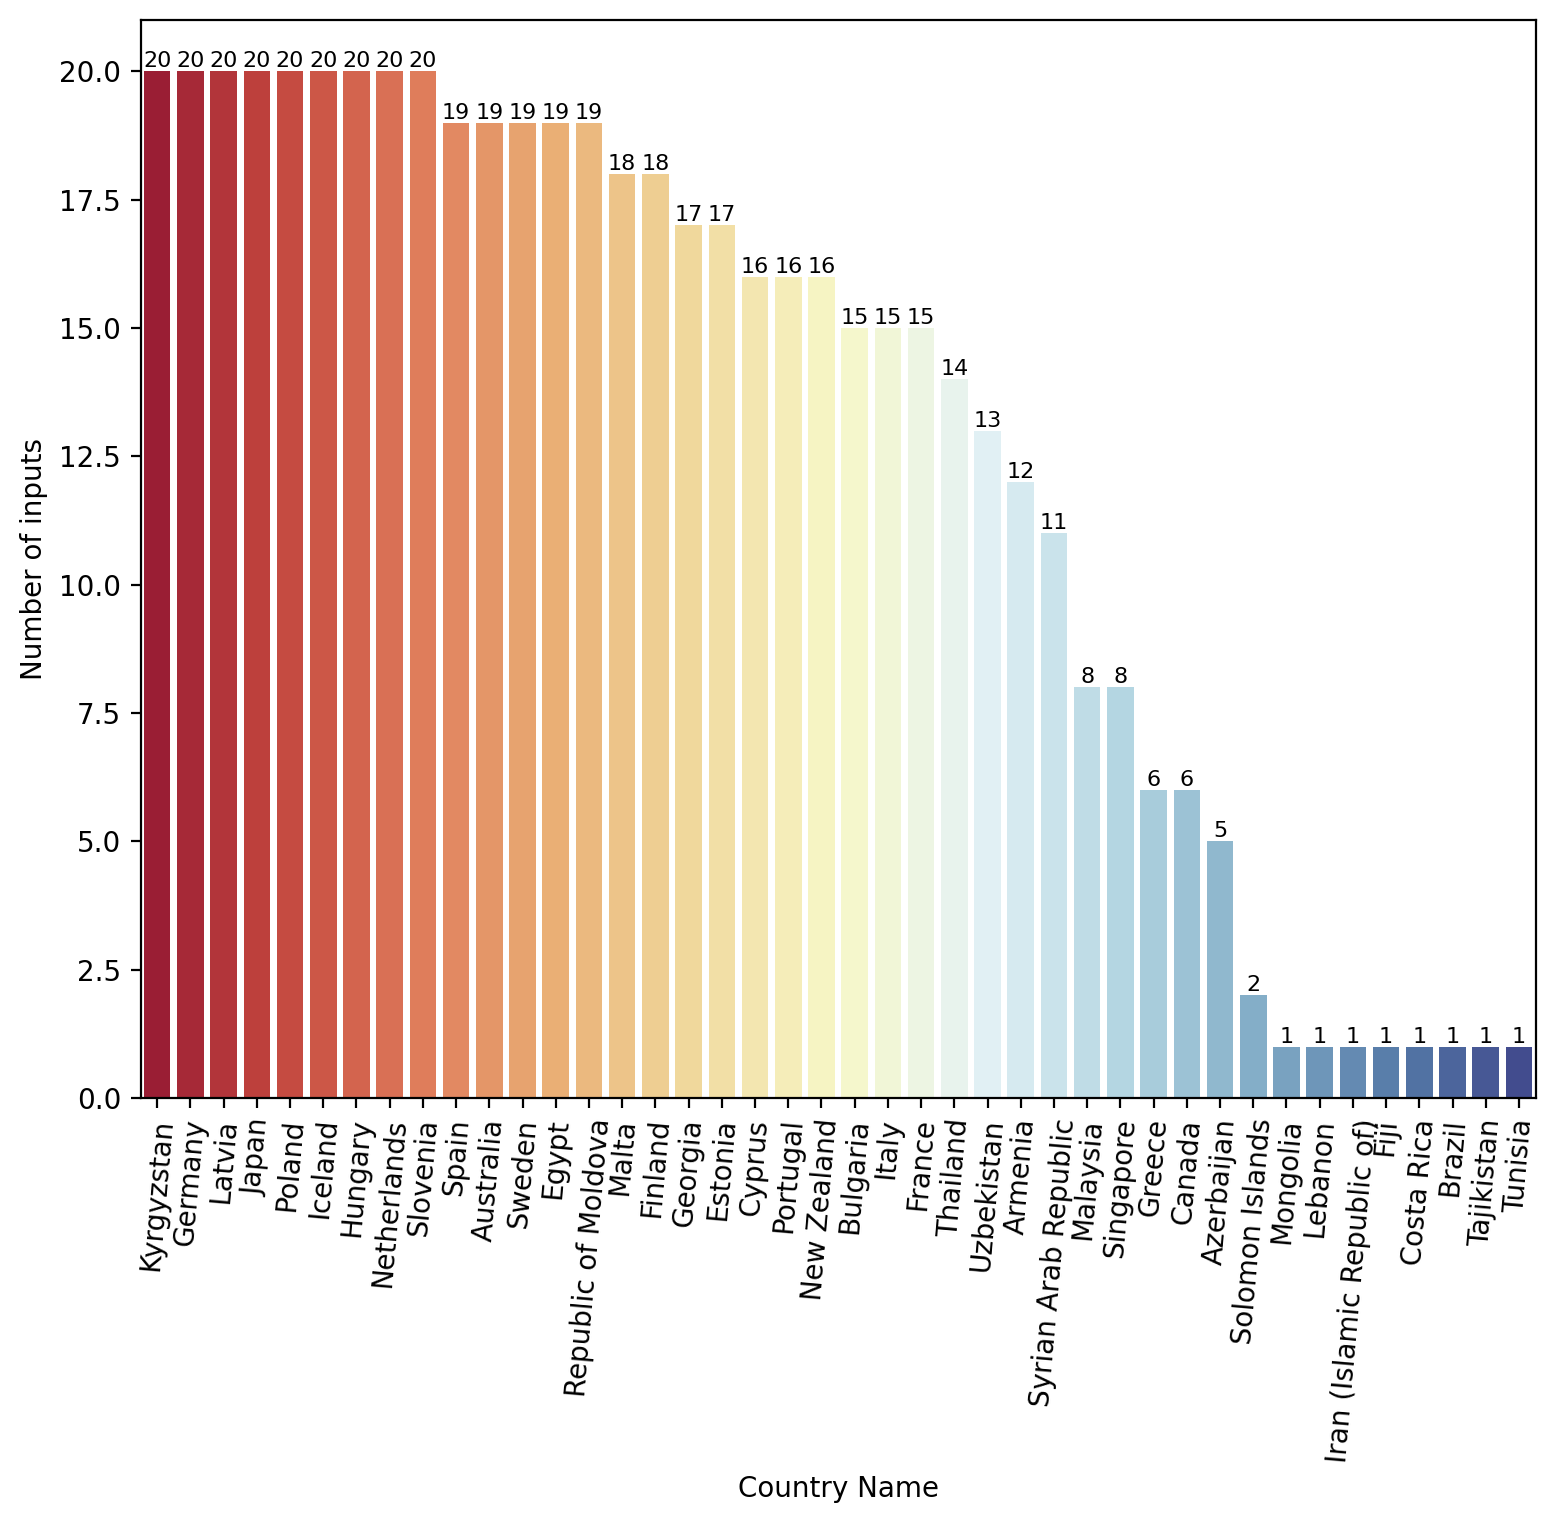

In [17]:
# Number of inputs of each country
fig, ax = plt.subplots();
sns.barplot(data=inputs_each_country.sort_values('Count', ascending=False), x='Country_Name', y='Count', errorbar=None, palette=("RdYlBu"), ax=ax);
# sns.despine(top=True, right=True);
ax.tick_params(axis='x', rotation=85);
ax.bar_label(ax.containers[0], size=8);
plt.xlabel('Country Name'); # plt.xlabel("Continent Names", size = 14)
plt.ylabel('Number of inputs');

In [18]:
# Sum of all deaths
Deaths_All_Types_Total = df.groupby('Country_Name').Deaths_All_Types.sum().reset_index();
Deaths_Suicides_Total = df.groupby('Country_Name').Deaths_Suicides.sum().reset_index();
# Deaths_Suicides_Total_Average = df.groupby('Country_Name').Deaths_Suicides.mean().reset_index();
HExp_Pctage_Y_Average = np.round(df.groupby('Country_Name').HExp_Pctage_Y.mean().reset_index(),2);

# Merging data
Compare_Deaths = pd.merge(Deaths_All_Types_Total, Deaths_Suicides_Total, on=['Country_Name', 'Country_Name']);

# Creating new column
Compare_Deaths['Deaths_Suicides_(%)'] = np.round(Compare_Deaths['Deaths_Suicides'].div(Compare_Deaths['Deaths_All_Types'])*100,2);

# Merging data
Compare_Deaths = pd.merge(Compare_Deaths, HExp_Pctage_Y_Average, on=['Country_Name', 'Country_Name']);
Compare_Deaths = pd.merge(inputs_each_country, Compare_Deaths, on=['Country_Name', 'Country_Name']);

# Creating new column
Compare_Deaths['Deaths_Suicides_Average'] = np.round(Compare_Deaths['Deaths_Suicides'].div(Compare_Deaths['Count']));

Compare_Deaths.head()

,Country_Name,Count,Deaths_All_Types,Deaths_Suicides,Deaths_Suicides_(%),HExp_Pctage_Y,Deaths_Suicides_Average
0,Armenia,12,653358,472,0.07,8.99,39.0
1,Australia,19,5511810,35,0.00,8.55,2.0
2,Azerbaijan,5,665358,701,0.11,2.58,140.0
3,Brazil,1,2699602,3,0.00,9.59,3.0
4,Bulgaria,15,3287010,7174,0.22,7.07,478.0


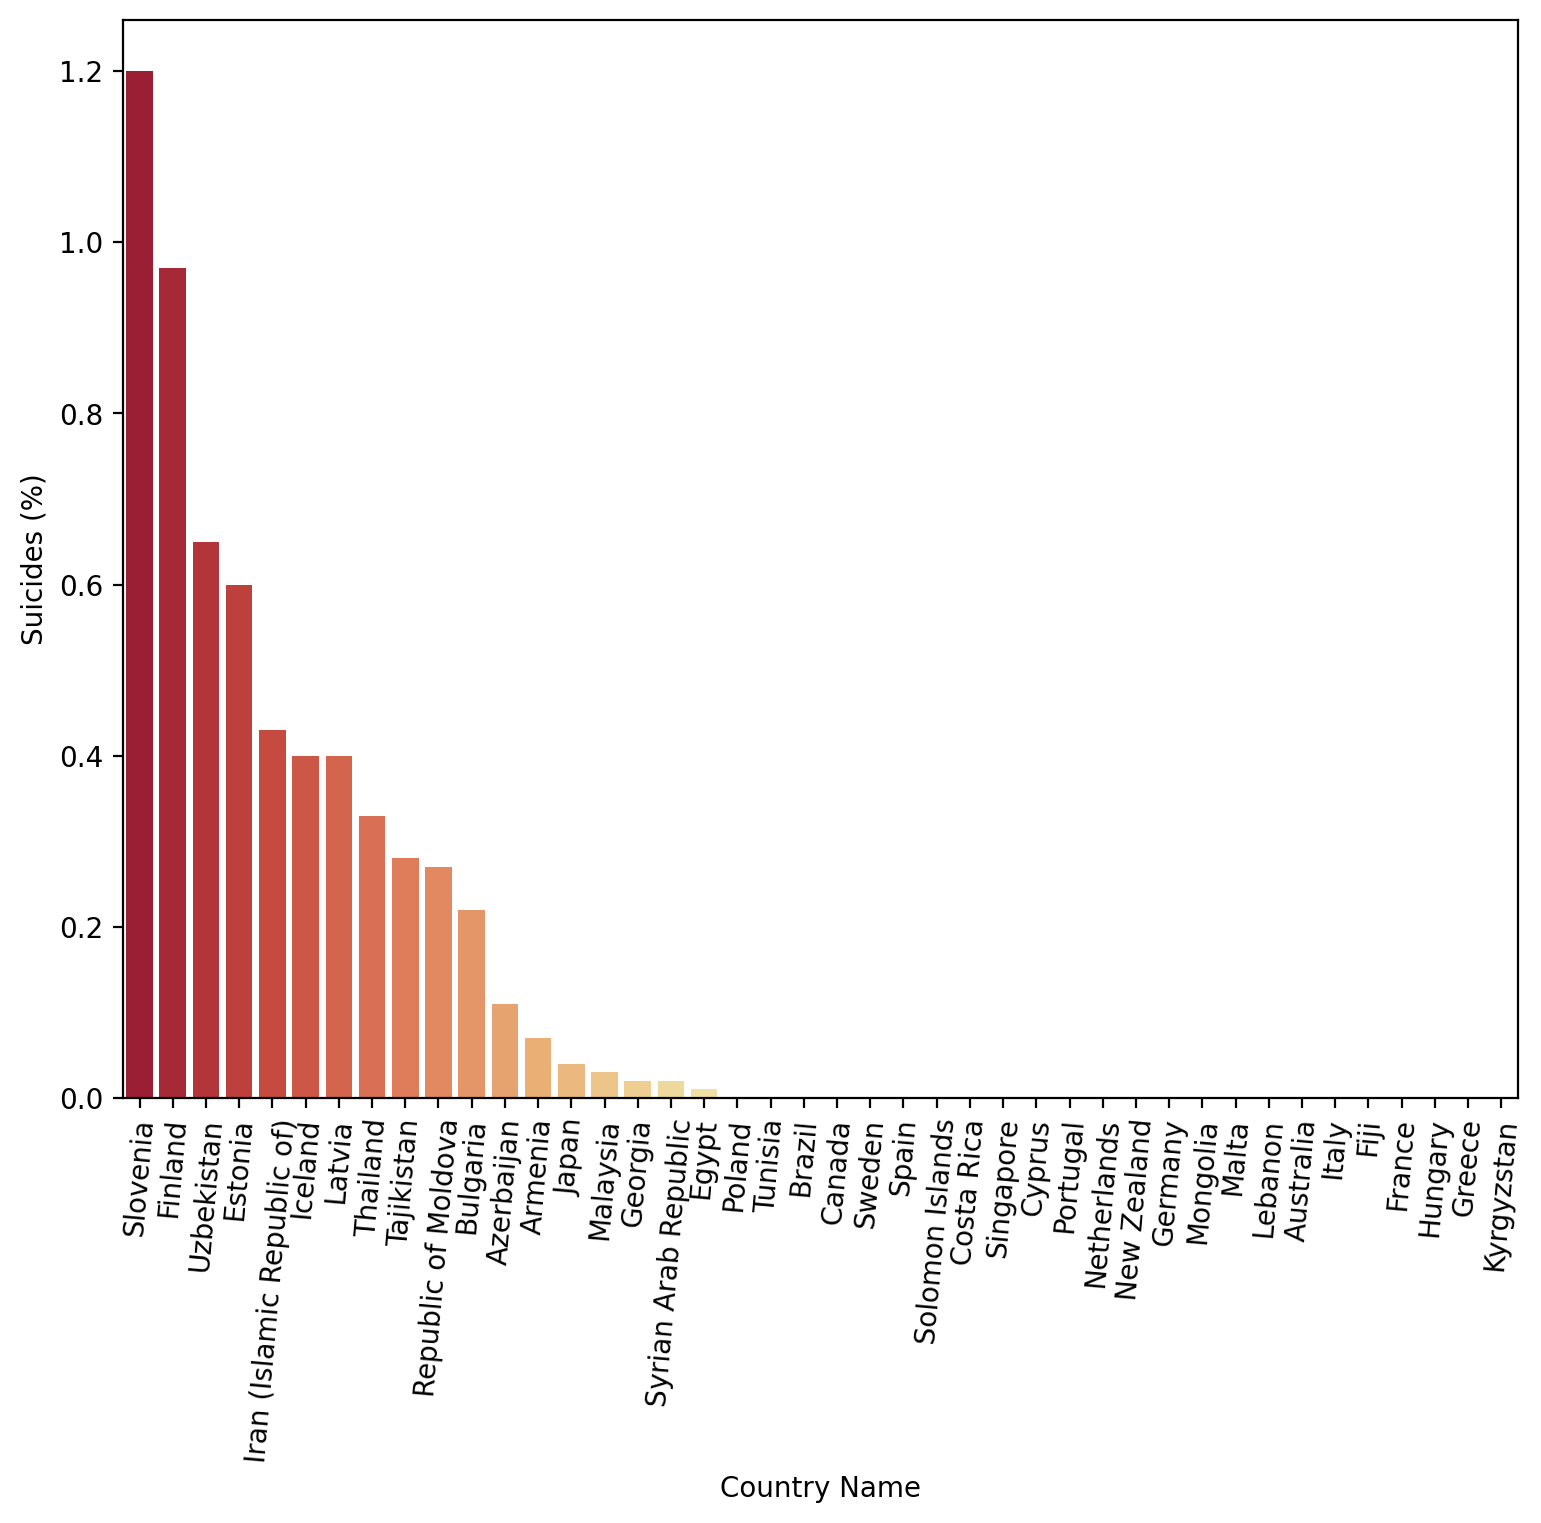

In [19]:
fig, ax = plt.subplots();
sns.barplot(data=Compare_Deaths.sort_values('Deaths_Suicides_(%)', ascending=False), x='Country_Name', y='Deaths_Suicides_(%)', errorbar=None, palette=("RdYlBu"), ax=ax)
# sns.despine(top=True, right=True);
ax.tick_params(axis='x', rotation=85)
plt.xlabel('Country Name'); # plt.xlabel("Continent Names", size = 14)
plt.ylabel('Suicides (%)');

Text(0, 0.5, 'Number of inputs')

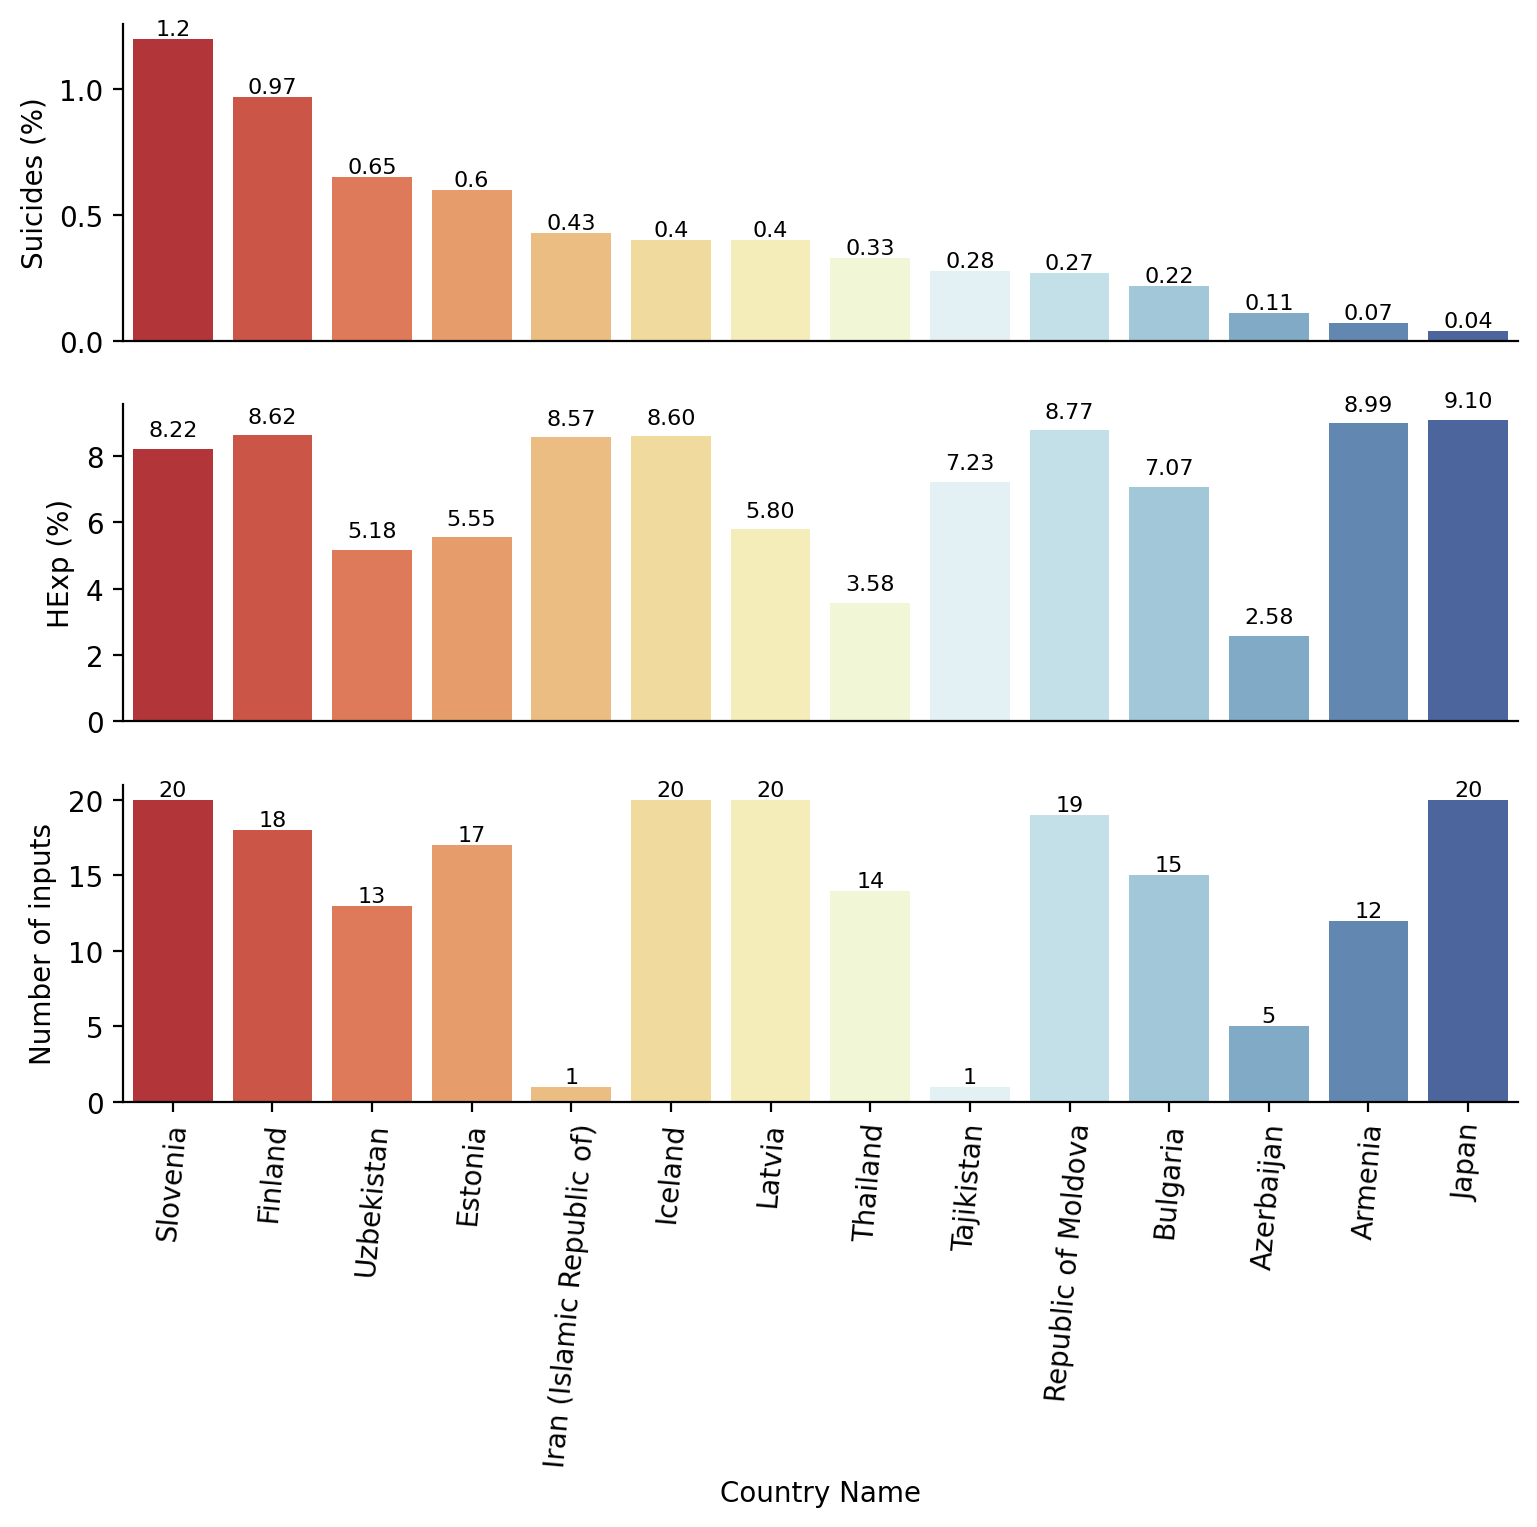

In [20]:
data_selected = Compare_Deaths.loc[Compare_Deaths['Deaths_Suicides_(%)'] >= 0.04]

fig, axes = plt.subplots(3, 1, sharex=True) # sharex and sharey are used to share one or both axes between the charts 
# fig.suptitle('Initial Pokemon - 1st Generation') # Main Title

sns.barplot(data=data_selected.sort_values("Deaths_Suicides_(%)", ascending=False), x="Country_Name", y="Deaths_Suicides_(%)", errorbar=None, palette=("RdYlBu"), ax=axes[0])
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].tick_params(axis='x', colors="w")
axes[0].bar_label(axes[0].containers[0], size=8) # , fmt='%.2f%%', padding=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('Suicides (%)')

sns.barplot(data=data_selected.sort_values("Deaths_Suicides_(%)", ascending=False), x="Country_Name", y="HExp_Pctage_Y", errorbar=None, palette=("RdYlBu"), ax=axes[1])
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].tick_params(axis='x', colors='w')
axes[1].bar_label(axes[1].containers[0], size=8, fmt='%.2f', padding=3)
axes[1].set_xlabel('')
axes[1].set_ylabel('HExp (%)')

sns.barplot(data=data_selected.sort_values('Deaths_Suicides_(%)', ascending=False), x='Country_Name', y='Count', errorbar=None, palette=("RdYlBu"), ax=axes[2])
axes[2].tick_params(axis='x', rotation=85)
axes[2].bar_label(axes[2].containers[0], size=8)
axes[2].spines['right'].set_visible(False)
axes[2].spines['top'].set_visible(False)
plt.xlabel('Country Name')
plt.ylabel('Number of inputs')

Text(0, 0.5, '')

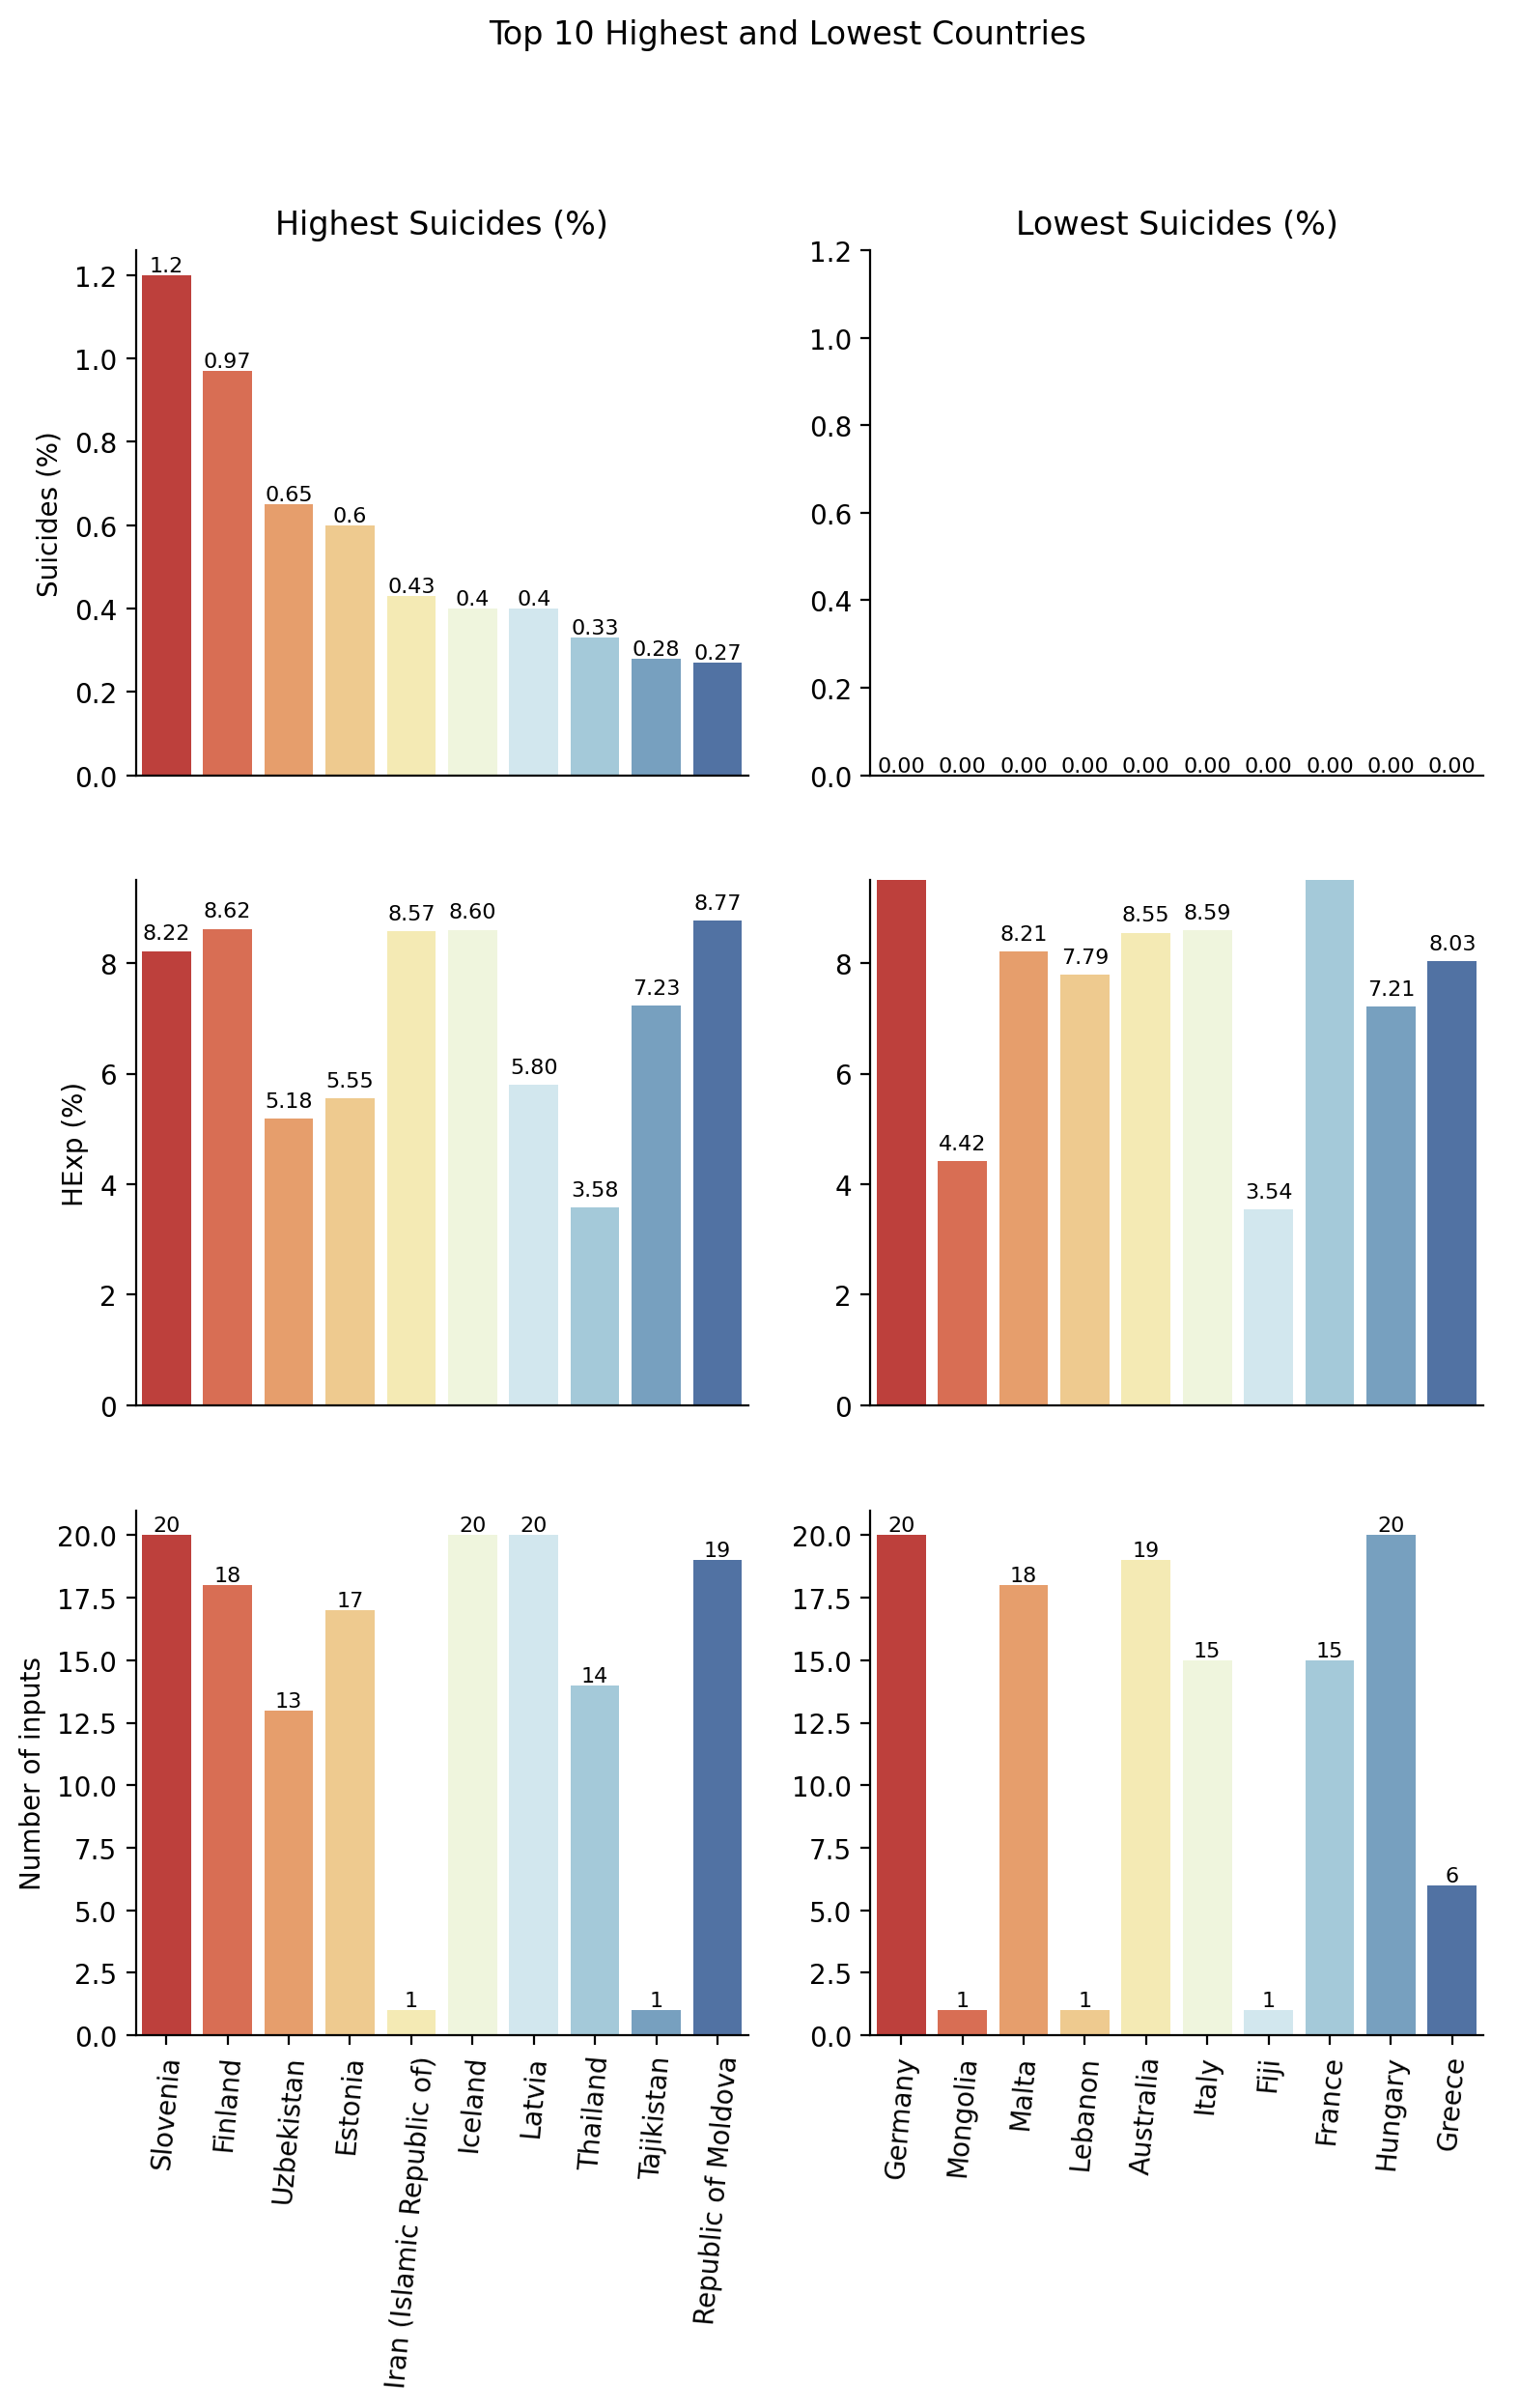

In [26]:
# data_selected_top = Compare_Deaths.loc[Compare_Deaths['Deaths_Suicides_(%)'] >= 0.04]
data_selected_top10_per = Compare_Deaths.sort_values("Deaths_Suicides_(%)", ascending=False)[0:10];
data_selected_bottom10_per = Compare_Deaths.sort_values("Deaths_Suicides_(%)", ascending=False)[-11:-1];

fig, axes = plt.subplots(3, 2, figsize=[9,12]) # sharex=True) sharex and sharey are used to share one or both axes between the charts 
fig.suptitle('Top 10 Highest and Lowest Countries') # Main Title

sns.barplot(data=data_selected_top10_per, x="Country_Name", y="Deaths_Suicides_(%)", errorbar=None, palette=("RdYlBu"), ax=axes[0,0])
axes[0,0].set_title('Highest Suicides (%)')
axes[0,0].spines['right'].set_visible(False)
axes[0,0].spines['top'].set_visible(False)
axes[0,0].tick_params(axis='x', colors="w")
axes[0,0].bar_label(axes[0,0].containers[0], size=8) #, fmt='%.2f%%', padding=3)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Suicides (%)')

sns.barplot(data=data_selected_top10_per, x="Country_Name", y="HExp_Pctage_Y", errorbar=None, palette=("RdYlBu"), ax=axes[1,0])
axes[1,0].spines['right'].set_visible(False)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].tick_params(axis='x', colors='w')
axes[1,0].set(ylim=(0, 9.5))
axes[1,0].bar_label(axes[1,0].containers[0], size=8, fmt='%.2f', padding=3)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('HExp (%)')
# ylabels = ['{:,.1f}'.format(y) for y in axes[1,0].get_yticks()] # Format axis tick labels
# axes[1,0].set_yticklabels(ylabels)

sns.barplot(data=data_selected_top10_per, x='Country_Name', y='Count', errorbar=None, palette=("RdYlBu"), ax=axes[2,0])
axes[2,0].tick_params(axis='x', rotation=85)
axes[2,0].bar_label(axes[2,0].containers[0], size=8)
axes[2,0].spines['right'].set_visible(False)
axes[2,0].spines['top'].set_visible(False)
axes[2,0].set_xlabel('')
axes[2,0].set_ylabel('Number of inputs')

sns.barplot(data=data_selected_bottom10_per, x="Country_Name", y="Deaths_Suicides_(%)", errorbar=None, palette=("RdYlBu"), ax=axes[0,1])
axes[0,1].set_title('Lowest Suicides (%)')
axes[0,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)
axes[0,1].tick_params(axis='x', colors="w")
axes[0,1].set(ylim=(0, 1.2))
axes[0,1].bar_label(axes[0,1].containers[0], size=8, fmt='%.2f') #, fmt='%.2f%%', padding=3)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')

sns.barplot(data=data_selected_bottom10_per, x="Country_Name", y="HExp_Pctage_Y", errorbar=None, palette=("RdYlBu"), ax=axes[1,1])
axes[1,1].spines['right'].set_visible(False)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].tick_params(axis='x', colors='w')
axes[1,1].set(ylim=(0.0, 9.5))
axes[1,1].bar_label(axes[1,1].containers[0], size=8, fmt='%.2f', padding=3)
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')

sns.barplot(data=data_selected_bottom10_per, x='Country_Name', y='Count', errorbar=None, palette=("RdYlBu"), ax=axes[2,1])
axes[2,1].tick_params(axis='x', rotation=85)
axes[2,1].bar_label(axes[2,1].containers[0], size=8)
axes[2,1].spines['right'].set_visible(False)
axes[2,1].spines['top'].set_visible(False)
axes[2,1].set_xlabel('')
axes[2,1].set_ylabel('')

In [35]:
Compare_Deaths.sort_values("Deaths_Suicides_Average", ascending=False)[:]

,Country_Name,Count,Deaths_All_Types,Deaths_Suicides,Deaths_Suicides_(%),HExp_Pctage_Y,Deaths_Suicides_Average
18,Iran (Islamic Republic of),1,679964,2925,0.43,8.57,2925.0
39,Thailand,14,11993478,39190,0.33,3.58,2799.0
41,Uzbekistan,13,3811190,24731,0.65,5.18,1902.0
20,Japan,20,46897594,20189,0.04,9.10,1009.0
11,Finland,18,1814404,17521,0.97,8.62,973.0
4,Bulgaria,15,3287010,7174,0.22,7.07,478.0
33,Slovenia,20,764616,9176,1.20,8.22,459.0
22,Latvia,20,1215080,4823,0.40,5.80,241.0
31,Republic of Moldova,19,1550438,4240,0.27,8.77,223.0
9,Estonia,17,567708,3425,0.60,5.55,201.0


Text(0, 0.5, '')

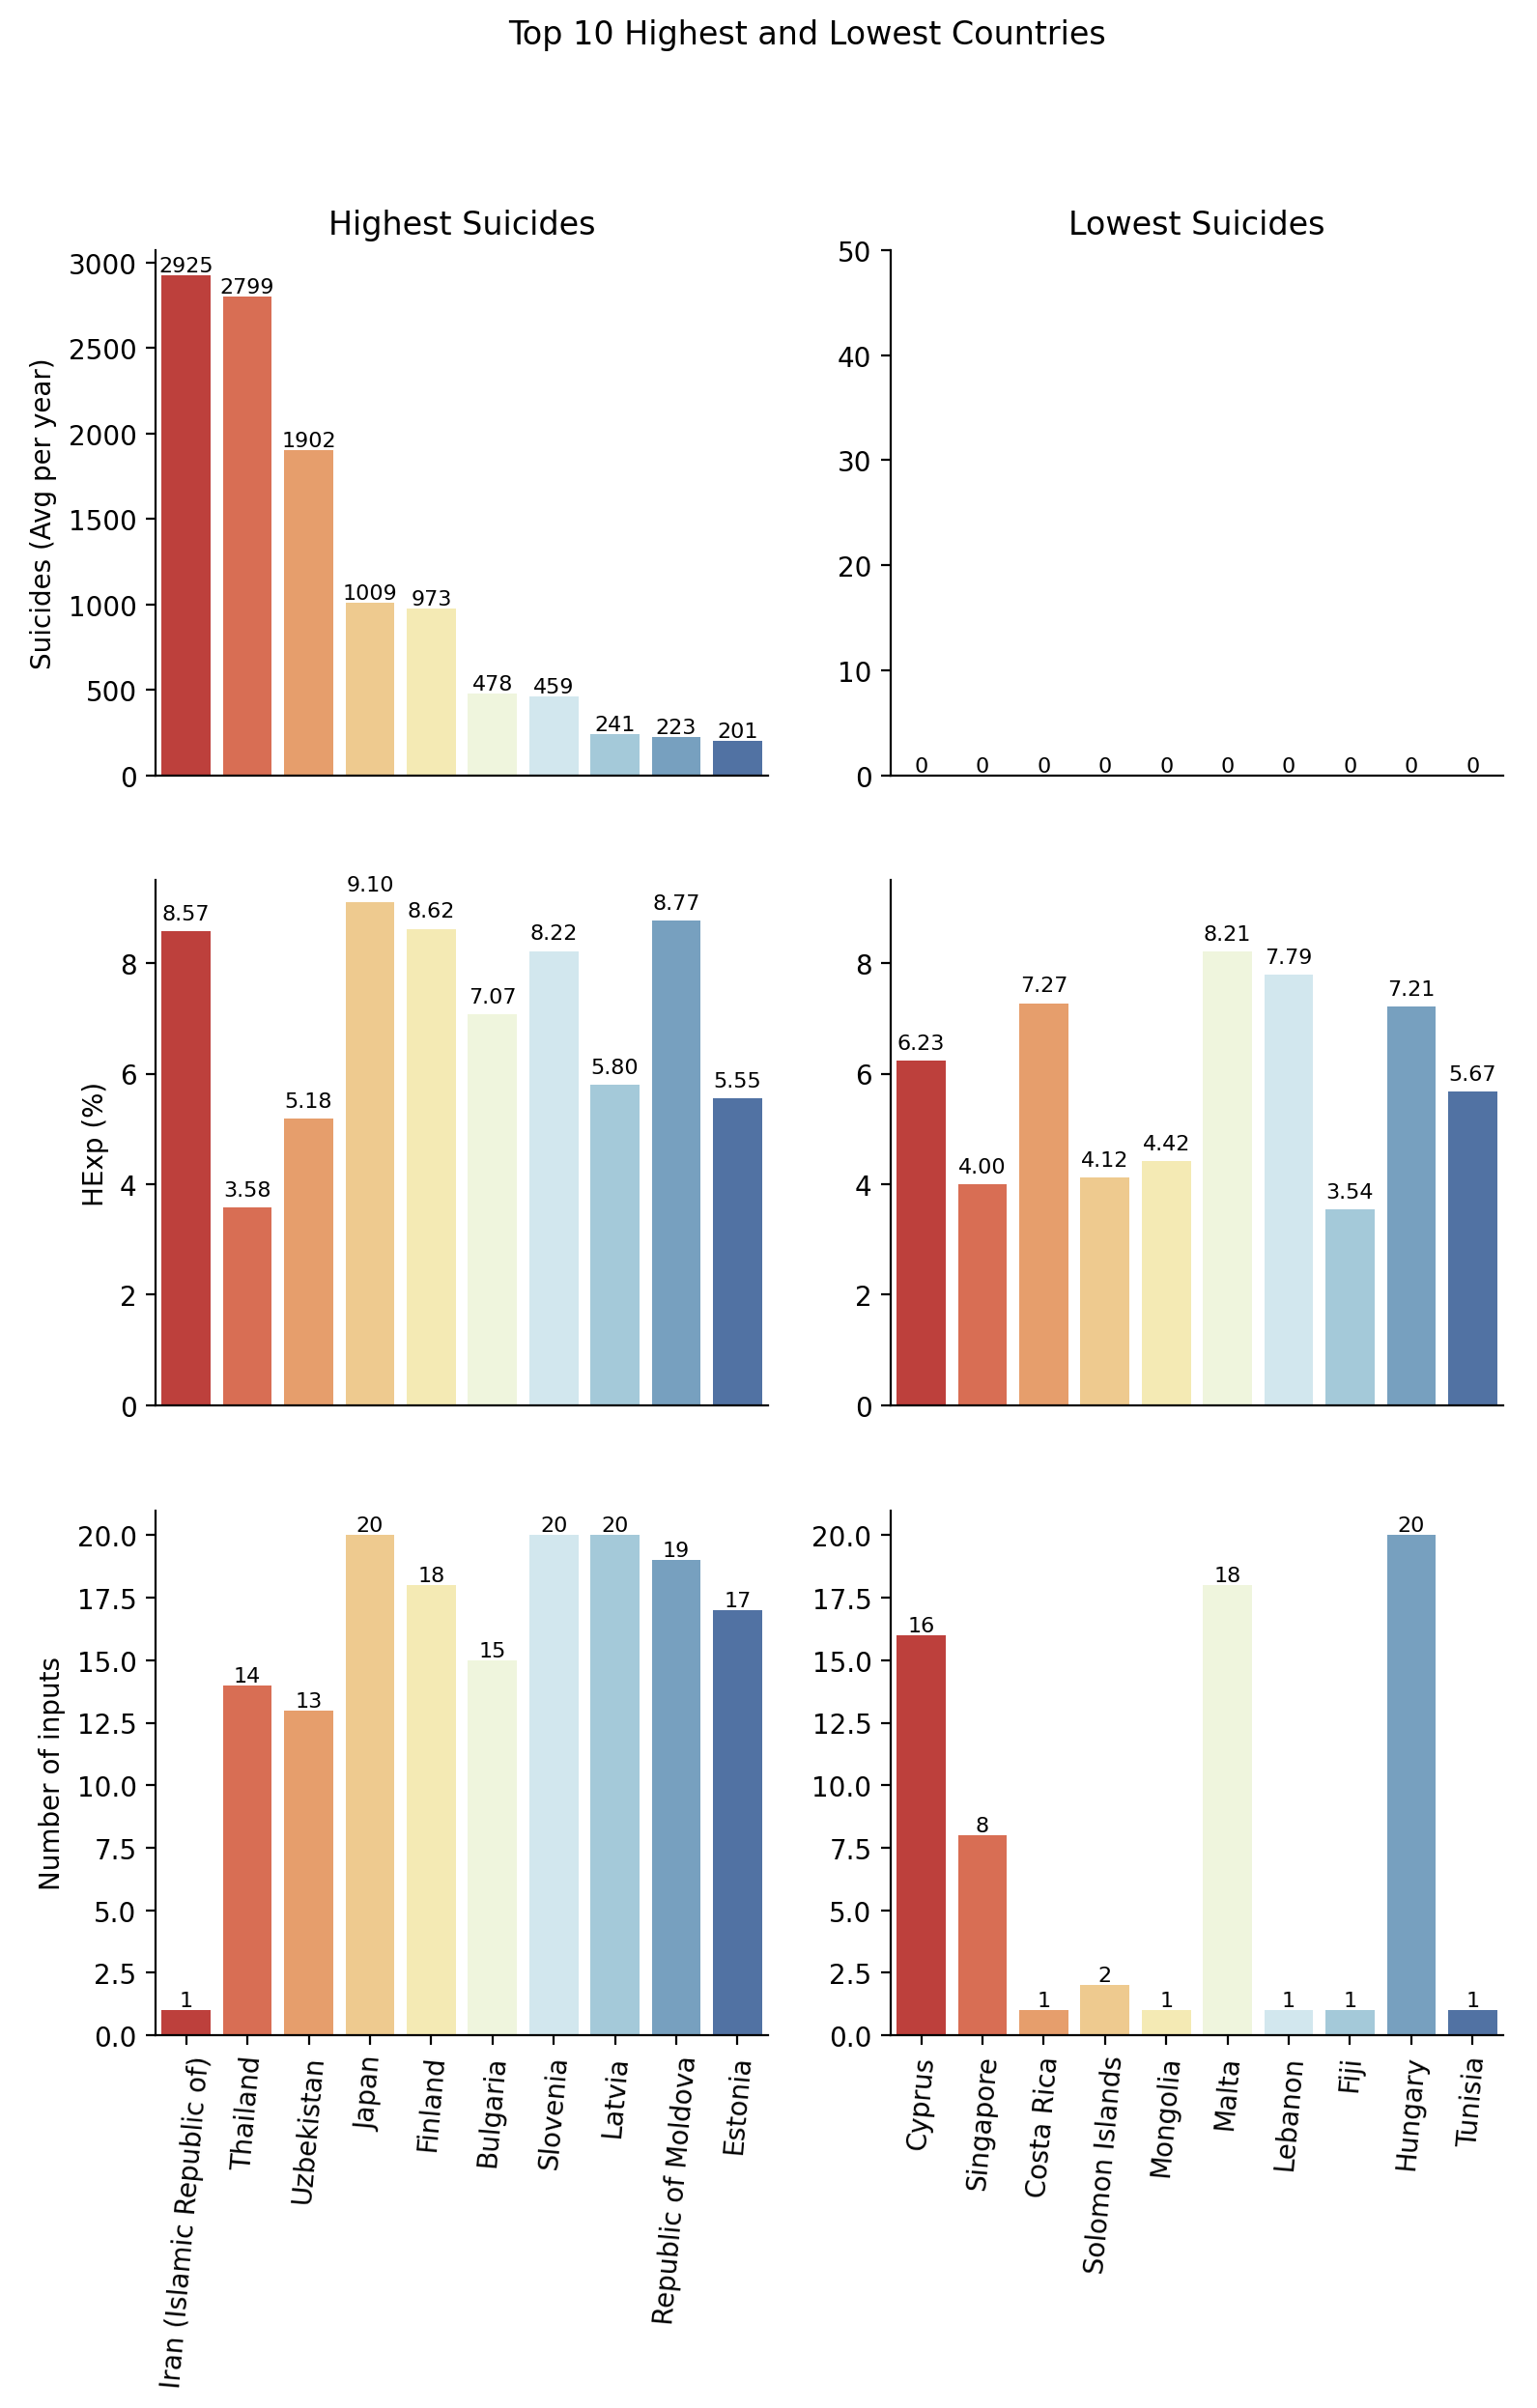

In [36]:
# data_selected_top = Compare_Deaths.loc[Compare_Deaths['Deaths_Suicides_(%)'] >= 0.04]
data_selected_top10 = Compare_Deaths.sort_values("Deaths_Suicides_Average", ascending=False)[0:10]
data_selected_bottom10 = Compare_Deaths.sort_values("Deaths_Suicides_Average", ascending=False)[-11:-1]

fig, axes = plt.subplots(3, 2, figsize=[9,12]) # sharex=True) sharex and sharey are used to share one or both axes between the charts 
fig.suptitle('Top 10 Highest and Lowest Countries') # Main Title

sns.barplot(data=data_selected_top10, x="Country_Name", y="Deaths_Suicides_Average", errorbar=None, palette=("RdYlBu"), ax=axes[0,0])
axes[0,0].set_title('Highest Suicides')
axes[0,0].spines['right'].set_visible(False)
axes[0,0].spines['top'].set_visible(False)
axes[0,0].tick_params(axis='x', colors="w")
axes[0,0].bar_label(axes[0,0].containers[0], size=8) #, fmt='%.2f%%', padding=3)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Suicides (Avg per year)')

sns.barplot(data=data_selected_top10, x="Country_Name", y="HExp_Pctage_Y", errorbar=None, palette=("RdYlBu"), ax=axes[1,0])
axes[1,0].spines['right'].set_visible(False)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].tick_params(axis='x', colors='w')
axes[1,0].set(ylim=(0, 9.5))
axes[1,0].bar_label(axes[1,0].containers[0], size=8, fmt='%.2f', padding=3)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('HExp (%)')
# ylabels = ['{:,.1f}'.format(y) for y in axes[1,0].get_yticks()] # Format axis tick labels
# axes[1,0].set_yticklabels(ylabels)

sns.barplot(data=data_selected_top10, x='Country_Name', y='Count', errorbar=None, palette=("RdYlBu"), ax=axes[2,0])
axes[2,0].tick_params(axis='x', rotation=85)
axes[2,0].bar_label(axes[2,0].containers[0], size=8)
axes[2,0].spines['right'].set_visible(False)
axes[2,0].spines['top'].set_visible(False)
axes[2,0].set_xlabel('')
axes[2,0].set_ylabel('Number of inputs')

sns.barplot(data=data_selected_bottom10, x="Country_Name", y="Deaths_Suicides_Average", errorbar=None, palette=("RdYlBu"), ax=axes[0,1])
axes[0,1].set_title('Lowest Suicides')
axes[0,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)
axes[0,1].tick_params(axis='x', colors="w")
axes[0,1].set(ylim=(0, 50)) # Set the range of y-axis
axes[0,1].bar_label(axes[0,1].containers[0], size=8) #, fmt='%.2f%%', padding=3)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')

sns.barplot(data=data_selected_bottom10, x="Country_Name", y="HExp_Pctage_Y", errorbar=None, palette=("RdYlBu"), ax=axes[1,1])
axes[1,1].spines['right'].set_visible(False)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].tick_params(axis='x', colors='w')
axes[1,1].set(ylim=(0.0, 9.5))
axes[1,1].bar_label(axes[1,1].containers[0], size=8, fmt='%.2f', padding=3)
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')

sns.barplot(data=data_selected_bottom10, x='Country_Name', y='Count', errorbar=None, palette=("RdYlBu"), ax=axes[2,1])
axes[2,1].tick_params(axis='x', rotation=85)
axes[2,1].bar_label(axes[2,1].containers[0], size=8)
axes[2,1].spines['right'].set_visible(False)
axes[2,1].spines['top'].set_visible(False)
axes[2,1].set_xlabel('')
axes[2,1].set_ylabel('')

Text(0, 0.5, '')

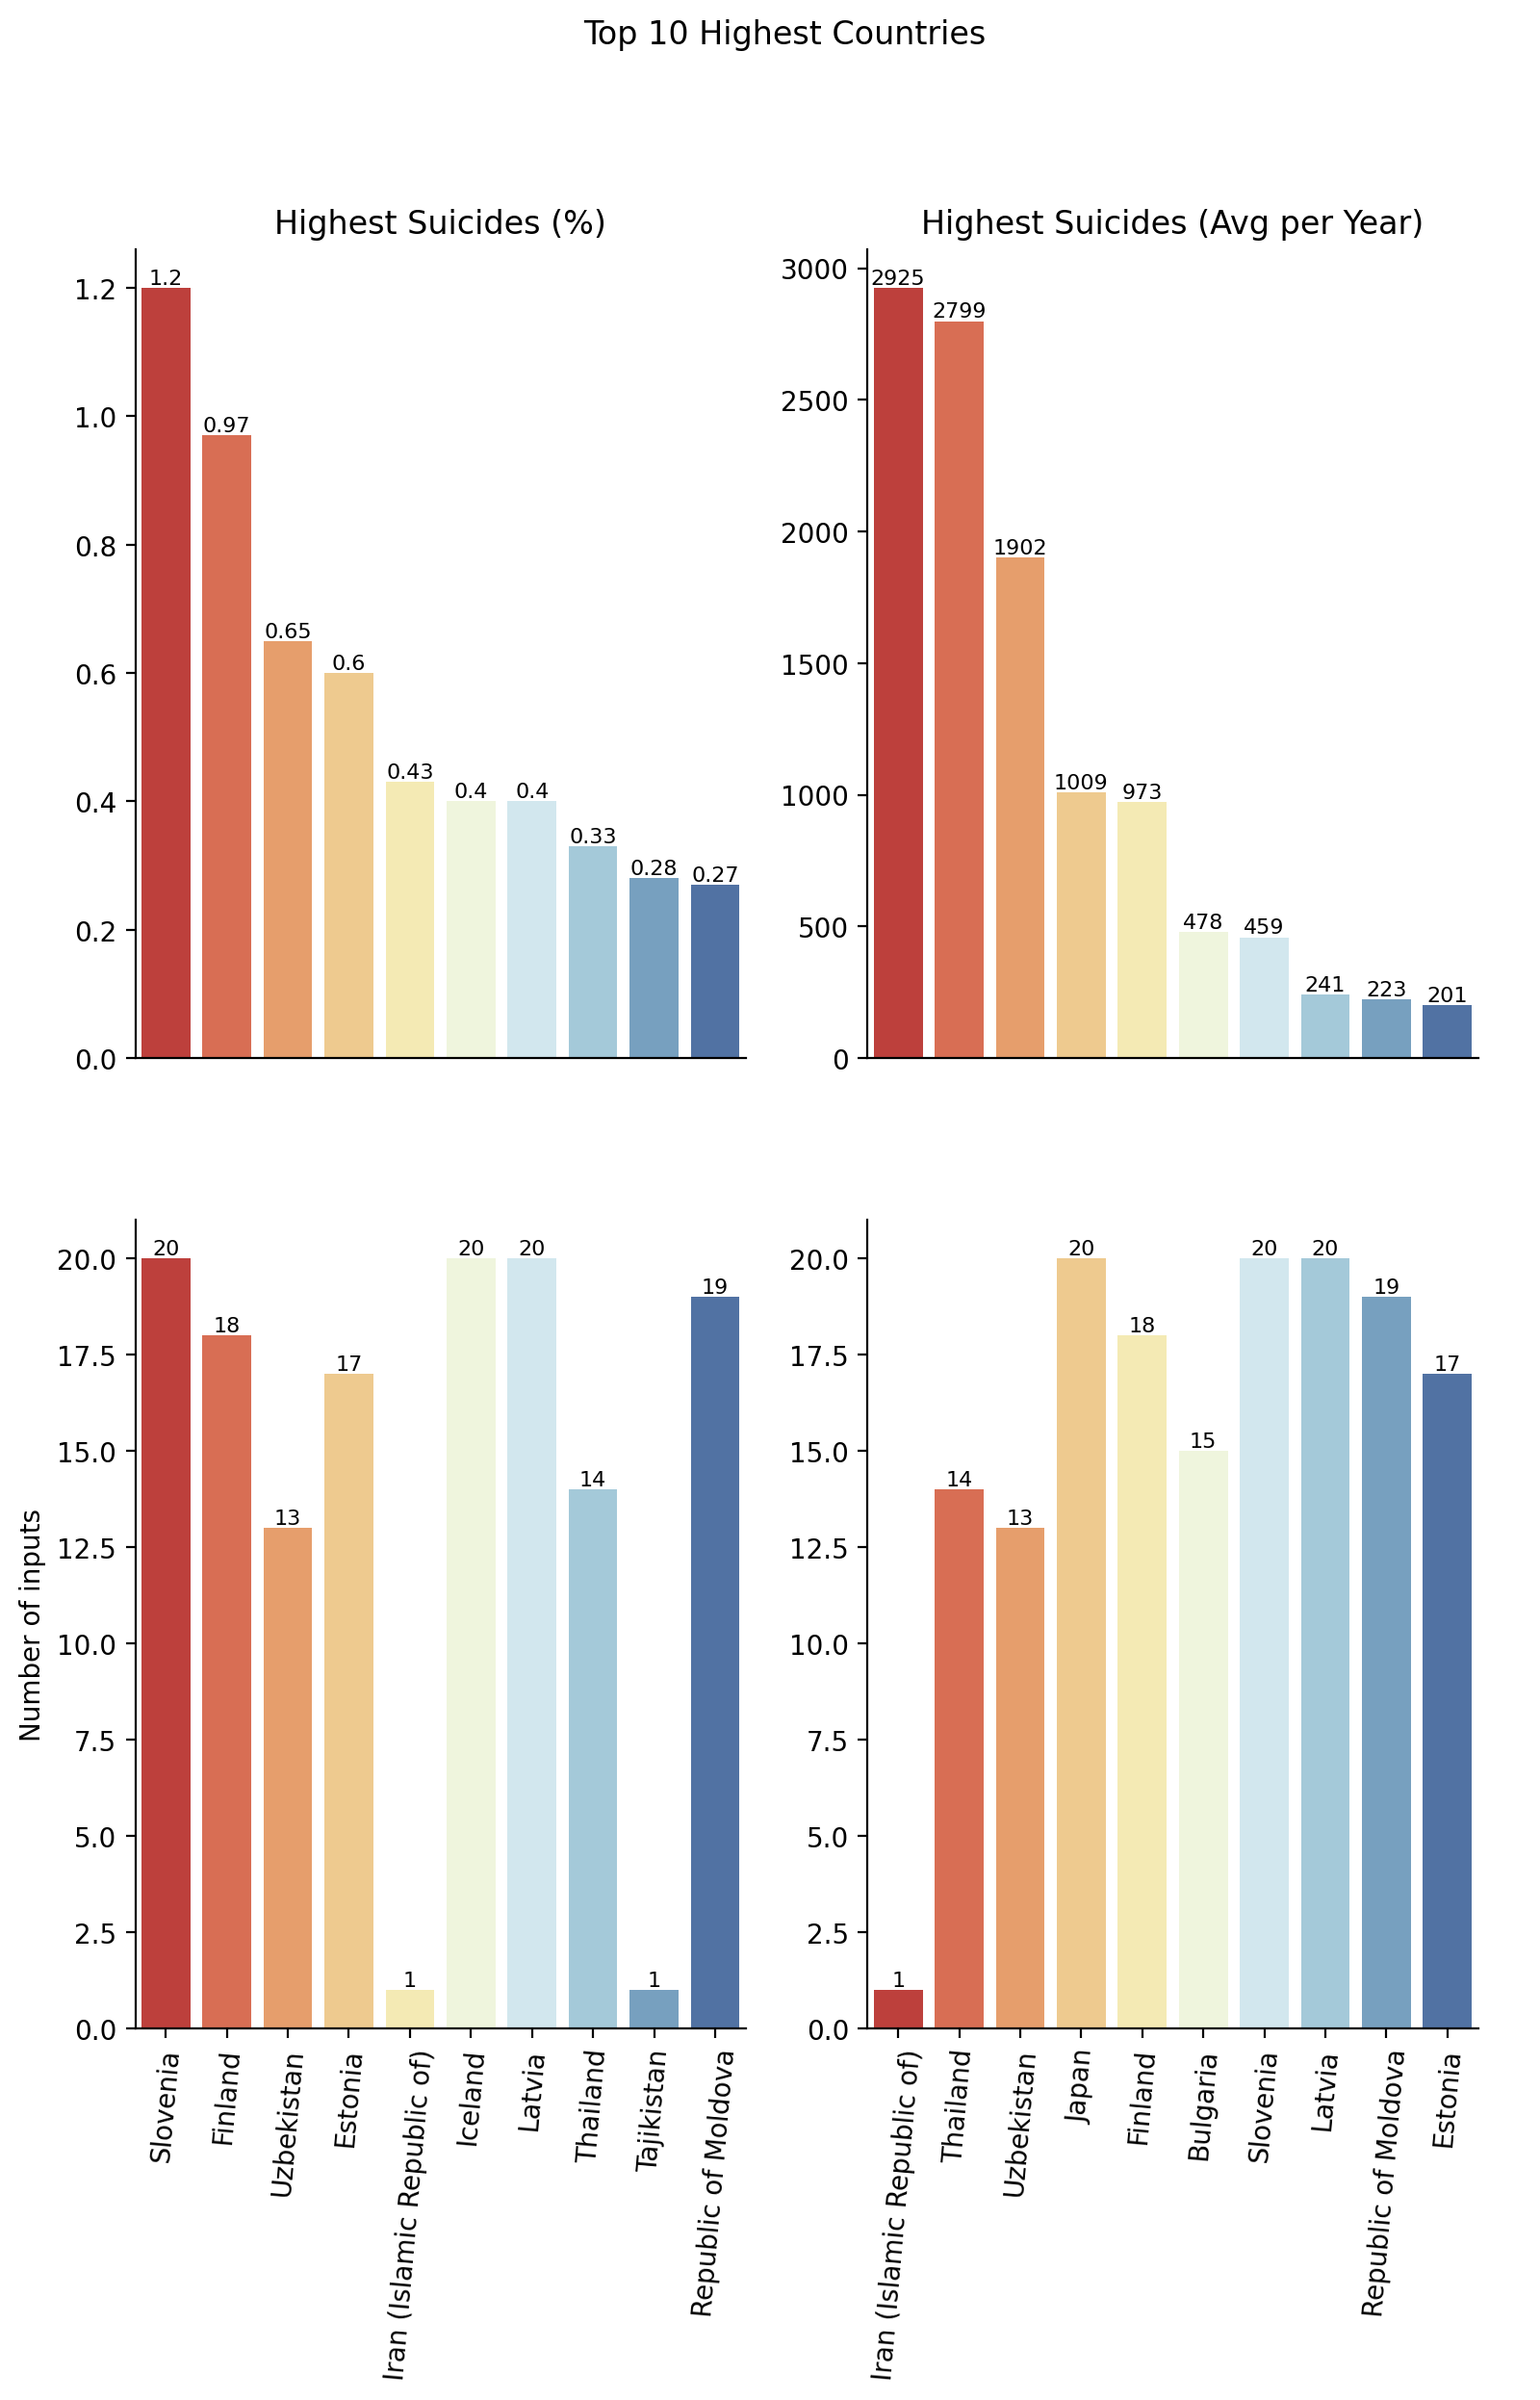

In [23]:
fig, axes = plt.subplots(2, 2, figsize=[9,12]) # sharex=True) sharex and sharey are used to share one or both axes between the charts 
fig.suptitle('Top 10 Highest Countries') # Main Title

sns.barplot(data=data_selected_top10_per, x="Country_Name", y="Deaths_Suicides_(%)", errorbar=None, palette=("RdYlBu"), ax=axes[0,0])
axes[0,0].set_title('Highest Suicides (%)')
axes[0,0].spines['right'].set_visible(False)
axes[0,0].spines['top'].set_visible(False)
axes[0,0].tick_params(axis='x', colors="w")
axes[0,0].bar_label(axes[0,0].containers[0], size=8) #, fmt='%.2f%%', padding=3)
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('')

sns.barplot(data=data_selected_top10_per, x='Country_Name', y='Count', errorbar=None, palette=("RdYlBu"), ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=85)
axes[1,0].bar_label(axes[1,0].containers[0], size=8)
axes[1,0].spines['right'].set_visible(False)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].set_xlabel('')
axes[1,0].set_ylabel('Number of inputs')

sns.barplot(data=data_selected_top10, x="Country_Name", y="Deaths_Suicides_Average", errorbar=None, palette=("RdYlBu"), ax=axes[0,1])
axes[0,1].set_title('Highest Suicides (Avg per Year)')
axes[0,1].spines['right'].set_visible(False)
axes[0,1].spines['top'].set_visible(False)
axes[0,1].tick_params(axis='x', colors="w")
axes[0,1].bar_label(axes[0,1].containers[0], size=8) #, fmt='%.2f%%', padding=3)
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('')

sns.barplot(data=data_selected_top10, x='Country_Name', y='Count', errorbar=None, palette=("RdYlBu"), ax=axes[1,1])
axes[1,1].tick_params(axis='x', rotation=85)
axes[1,1].bar_label(axes[1,1].containers[0], size=8)
axes[1,1].spines['right'].set_visible(False)
axes[1,1].spines['top'].set_visible(False)
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')
